<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Implementación de forward y back propagation en una Red Neuronal con y sin Keras: compuertas lógicas OR, AND y XOR</h1> </div>

Desarrollado por: Ing. Remigio Hurtado Ortiz, PhD. Correo de contacto: remigiohurtado@gmail.com

En esta práctica aprenderás los pasos de una red neuronal mediante ejemplos clásicos para que puedas comprender su proceso y su gran capacidad de aprendizaje. Para ello, se diseñará una red neuronal sin Keras y con Keras para aprender las operaciones de las compuertas lógicas: OR, AND y XOR. 

Requisitos: es importante tener conocimientos de Python y de Fundamentos de Machine Learning. Te sugerimos previamente revisar la práctica: <a href="https://genscinet.com/transformacion-clasificacionknn/" target="blank">transformación de variables categóricas y clasificación con KNN</a>.

Esta práctica está estructurada de la siguiente manera:

- [Definiciones](#definiciones)

- [Formación de Datasets](#dataset)

- [Red neuronal sin Keras: Forward, Cálculo de Error y Backpropagation](#RNproceso)

- [Red neuronal con Keras](#RNkeras)

- [Conclusiones](#Conclusiones)

- [Referencias y enlaces](#Referencias-enlaces)

<div id="definiciones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Definiciones</h2> </div>

Las redes neuronales son modelos computacionales que se inspiran en el funcionamiento del cerebro humano para realizar tareas de procesamiento de información. Estas redes consisten en un conjunto de unidades llamadas "neuronas artificiales" o "nodos" interconectadas, que trabajan en conjunto para realizar cálculos y tomar decisiones. Una característica fundamental de las redes neuronales es su capacidad para aprender y adaptarse a partir de datos.

- **Neuronas Artificiales:** Cada neurona artificial en una red neuronal realiza cálculos en función de las entradas que recibe. Estas entradas están ponderadas por valores llamados "pesos".

- **Aprendizaje por Ajuste de Pesos:** El proceso de aprendizaje en una red neuronal implica el ajuste de estos pesos. Durante la fase de entrenamiento, la red neuronal se expone a un conjunto de datos de entrada y se compara la salida producida por la red con las salidas deseadas (etiquetas). Los pesos se ajustan de manera iterativa para minimizar la diferencia entre las salidas reales y las deseadas.

- **Establecimiento de Reglas:** A medida que la red neuronal se entrena con un conjunto de datos, los ajustes de pesos permiten que la red establezca relaciones y patrones en los datos. Estos ajustes de pesos representan las "reglas" que la red ha aprendido a partir de los datos de entrenamiento. En otras palabras, la red neuronal adapta sus conexiones (los pesos) para realizar transformaciones matemáticas que modelan las relaciones en los datos.

- **Generalización:** Una vez que la red ha aprendido las reglas a partir de los datos de entrenamiento, puede generalizar ese conocimiento para realizar tareas similares en nuevos datos que no formaron parte del conjunto de entrenamiento.

<div style="color:#106ba3"><h3>Función de activación sigmoide, su derivada y función de costo</h3> </div>

$$f(z)=\frac{1}{1+e^{-z}}$$

$$f'(z)=f(z)(1-f(z))$$

$$y:predicción$$ 
$$t:real (target)$$
$$x:input$$
$$w:peso$$

$$y=x*w $$

$$cost= \sum{(t - y)^2} $$

<div id="dataset" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Formación de Datasets</h2> </div>

In [1]:
import numpy as np
import pandas as pd

In [2]:
#COMPUERTA NOT

#Dataset: Entradas
X = np.array([[0],
              [0],
              [0],
              [1],
              [1],
              [1]])
                
#Salidas reales -> Aprendizaje Supervisado

y = np.array([[1],
          [1],
	      [1],
          [0],
          [0],    
          [0]])

X

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [7]:

#Datasets:
 
#COMPUERTA AND DE 2 ENTRADAS: cuando todas las entradas son 1, la salida es 1. Se agregan más filas (observaciones) para que
# la red aprenda mejor
    
#Dataset: Entradas
X = np.array([[0,0],
              [0,0],
              [0,0],
              [1,1],
              [1,1],
              [1,1]])
                
#Salidas reales -> Aprendizaje Supervisado

y = np.array([[1],
           [1],
          [1],
          [-1],
	      [-1],
          [-1]])

X

array([[0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1]])

In [14]:
#Datasets:
 
#COMPUERTA AND DE 2 ENTRADAS: cuando al menos una entrada es 1, la salida es 1
    
#Dataset: Entradas
X = np.array([[0,0],
              [0,1],
              [1,0],
              [0,0],
              [1,1],
              [1,1],
              [1,1],
              [1,1],
              [1,0],
              [0,1],
              [1,0],
              [0,1],
              [1,0],
              [1,1],
              [1,1],
              [1,1]])
                
#Salidas reales -> Aprendizaje Supervisado

y = np.array([[0],
          [0],
	      [0],
          [0],
          [1],
	      [1],
          [1],
	      [1],
	      [0],
          [0],
	      [0],
	      [0],
          [0],
	      [1],
	      [1],
          [1]])

In [2]:
#COMPUERTA OR DE 3 ENTRADAS: cuando al menos una entrada es 1, la salida es 1
    
#Dataset: Entradas
X = np.array([[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,1,1],
              [1,1,1],
              [1,1,1]])
                
#Salidas reales -> Aprendizaje Supervisado

y = np.array([[0],
	      [0],
	      [0],
          [0],
	      [0],
          [1],
	      [1],
          [1]])

In [11]:
#DATASET PARA XOR
import numpy as np
#XOR: tiene un uno (“1”) en su salida cuando la suma de los unos “1” en las entradas es igual a un número impar.
#Ref: http://tecdig2013g7.blogspot.com/2013/03/http2bpblogspotcom-dlcdju.html

#Dataset: Entradas
X = np.array([[0,0,0,0],
            [0,0,0,1],
            [0,0,1,0],
            [0,0,1,1],
            [0,1,0,0],
            [0,1,0,1],
            [0,1,1,0],
            [0,1,1,1],
            [1,0,0,0],
            [1,0,0,1],
            [1,0,1,0],
            [1,0,1,1],
            [1,1,0,0],
            [1,1,0,1],
            [1,1,1,0],
            [1,1,1,1]])
                
#Salidas reales -> Aprendizaje Supervisado
y = np.array([[0],
	      [1],
	      [1],
	      [0],
	      [1],
          [0],
	      [0],
          [1],
	      [1],
          [0],
	      [0],
          [1],
	      [0],
          [1],
	      [1],
          [0]])

In [6]:
#Compuertas lógicas
#Ref: http://tecdig2013g7.blogspot.com/2013/03/http2bpblogspotcom-dlcdju.html

import numpy as np

#Dataset: Entradas
X = np.array([[0,1]])
                
#Salidas reales -> Aprendizaje Supervisado

y = np.array([[0]])

<div id="RNproceso" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Red neuronal sin Keras: Forward, Cálculo de Error y Backpropagation</h2> </div>

In [3]:
#Funciones

def sigmoid(z):
    """ función sigmoide """
    fz=1/(1+np.exp(-z))
    return fz

def derivada(fz):
    """ derivada de la función sigmoide """
    return fz*(1-fz)

def tanh(x):
    """ función tangente hiperbólica """
    return np.tanh(x)
 
def tanh_derivada(x):
    """ derivada de la función tangente hiperbólica """
    return 1.0 - x**2

In [17]:
# Construcción

#Como paso opcional, definimos una seed (semilla), para tener los mismo resultados, e inicializamos de forma aleatoria los pesos.
#La primera matriz de pesos tiene que ser de un tamaño fijo, en este caso (2,3) porque tenemos 2 valores de entrada 
#(es decir, 2 variables o características) y la siguiente capa tiene 3, entonces la salida tiene que tener la misma cantidad 
#de entradas que tiene la siguiente capa.

np.random.seed(1)

#syn0=np.array([[0.1,0.3,0.5],
#               [0.2,0.4,0.6]])
#syn1=np.array([[0.7],
#               [0.9],
#               [0.11]])

syn0 = np.random.random((4,16))
syn1 = np.random.random((16,1))

print('********** ENTRADAS')
print(X)
print('********** PESOS PARA CAPA DE ENTRADA')
print(syn0)
print('********** PESOS PARA CAPA DE SALIDA')
print(syn1)

********** ENTRADAS
[[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 1 1]]
********** PESOS PARA CAPA DE ENTRADA
[[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
  1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
  3.96767474e-01 5.38816734e-01 4.19194514e-01 6.85219500e-01
  2.04452250e-01 8.78117436e-01 2.73875932e-02 6.70467510e-01]
 [4.17304802e-01 5.58689828e-01 1.40386939e-01 1.98101489e-01
  8.00744569e-01 9.68261576e-01 3.13424178e-01 6.92322616e-01
  8.76389152e-01 8.94606664e-01 8.50442114e-02 3.90547832e-02
  1.69830420e-01 8.78142503e-01 9.83468338e-02 4.21107625e-01]
 [9.57889530e-01 5.33165285e-01 6.91877114e-01 3.15515631e-01
  6.86500928e-01 8.34625672e-01 1.82882773e-02 7.50144315e-01
  9.88861089e-01 7.48165654e-01 2.80443992e-01 7.89279328e-01
  1.03226007e-01 4.47893526e-01 9.08595503e-01 2.93614148e-01]
 [2.87775339e-01 1

In [18]:
#Entrenamiento

for j in range(100000):#cantidad de epochs (un epoch es una pasada de forwarding y backpropagation)
    
    #1. Forward Propagation: 
    #producto punto de nuestros datos por nuestros pesos (Suma Ponderada) y lo pasamos por nuestra función de activación.
    #Y para la siguiente capa multiplicamos los valores de la capa anterior y nuestra capa de pesos de la segunda capa. 
    #A esto nos referimos a que están cada una de las neuronas de la capa anterior conectadas con las neuronas 
    #de la capa siguiente.

    l0 = X
    #print('********** X')
    #print(l0)
    l1 = sigmoid(np.dot(l0,syn0)) #np.dot(l0,syn0) es z  
    #print('********** Salidas de capa 1')
    #print(l1)
    l2 = sigmoid(np.dot(l1,syn1)) #Estas son las predicciones
    #print('********** Salidas de capa 2 (salida)')
    #print(l2)
    
    #2. Calculo del Error: entre predicciones actuales y reales para determinar la Función de Pérdida
    l2_error = y - l2
    #print('********** Errores en capa de salida')
    #print(l2_error)     
    
    #Algoritmo de Descenso de Gradiente: la pendiente (la tasa de cambio) se calcula multiplicando nuestra pérdida actual 
    #con la derivada de nuestras predicciones actuales, de esta manera vamos a saber para que dirección ajustar los pesos.
    
    #Cálculo de gradiente en la capa de salida  
    l2_delta = l2_error*derivada(l2) #es la pendiente (direcciones hacia donde mover pesos). 
    #n (tasa de aprendizaje) es 1. l2 son las predicciones actuales, es decir, las entradas X de la capa actual.
    #print('********** Gradiente en capa de salida')
    #print(l2_delta)
    
    #3. Backpropagation: propagar el error hacia atrás -> "la dirección hacia donde moveremos los pesos de la ultima capa"
    
    #multiplicar la pendiente "l2_delta" por la transpuesta de los pesos de la capa anterior "syn1.T", de este modo 
    #propagaremos el error hacia atrás, y de esta manera la capa anterior "l1" calculará la dirección "l1_delta" hacia 
    #donde debe mover los pesos "syn1" y "syn0".
    
    #Cálculo de gradiente en la capa intermedia 
    l1_error = l2_delta.dot(syn1.T)
    #print('********** Errores en capa 1')
    #print(l1_error)
    l1_delta = l1_error * derivada(l1)
    #print('********** Gradiente en capa 1')
    #print(l1_delta)
    
    #Finalmente, ajustamos el valor de nuestros pesos, multiplicando la transpuesta de la capa por sus respectivas 
    #optimizaciones, o direcciones hacia donde actualizar los pesos, y esto se suma a nuestros pesos actuales, 
    #actualizando las dos capas a la vez.
    
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

print('********** Pesos de capa 1')
print(syn0)
print('********** Pesos de capa 2 (salida)')
print(syn1)
print('********** Predicciones')
print(l2)

#Se presenta las entradas, los valores reales y predicciones
#Se forma un dataframe con X
df = pd.DataFrame(X, columns = ['X1','X2','X3','X4'])
df.head()
y_pred = (l2 >= 0.5).astype("int32")

#y_pred = 

y_pred = y_pred.flatten()# de 2D a 1D
y_real=y.flatten()
#Se forma un dataframe con los valores reales y predicciones
dataframeSalida=pd.DataFrame({'real':y_real, 'predicción': y_pred})
dataframeSalida.head()
#Se concatena los dataframes de X y los valores reales y de predicción, esto con respecto al eje 1 (columnas)
df=pd.concat([df, dataframeSalida], axis=1)
df.head(16)

********** Pesos de capa 1
[[-5.72314034  3.15754297 -1.41888076 -3.85951913 -3.23284393 -1.85610637
  -1.3068532  -5.19229613 -1.51766293 -6.35715466 -3.83707242 -0.86206763
   3.178219    2.83426189 -7.18041109 -0.77759155]
 [-6.35892283 -2.90088599 -0.92507359 -3.71088534  0.80774489 -0.64186958
  -1.32617992  7.0636971  -0.84580017  2.78234714 -4.73835824 -1.73720965
  -6.22739874  2.28638446 -6.69068195 -1.93260171]
 [ 8.13800787  6.56711139  0.72671687 -3.07636117  1.59722446  0.45291465
   3.30222847 -2.706816    0.25911177  4.41068024 -2.84514306  0.36623314
   4.8461254   0.300763    4.98958606 -0.61948298]
 [-6.21373867 -2.70337892 -2.15932094 -3.3649843  -3.46771258 -1.90162193
   0.91645989 -5.37626959 -1.56991558 -6.27177967  5.50387102 -1.53507505
  -6.57128215  2.51832342  3.20333621 -1.26272498]]
********** Pesos de capa 2 (salida)
[[-14.88319375]
 [-11.00098416]
 [  1.31219941]
 [ -6.40508717]
 [  2.83700975]
 [  0.6115635 ]
 [ -3.29095691]
 [ -9.94574363]
 [  0.359421

,X1,X2,X3,X4,real,predicción
0,0,0,0,0,0,0
1,0,0,0,1,1,1
2,0,0,1,0,1,1
3,0,0,1,1,0,0
4,0,1,0,0,1,1
5,0,1,0,1,0,0
6,0,1,1,0,0,0
7,0,1,1,1,1,1
8,1,0,0,0,1,1
9,1,0,0,1,0,0


<div id="RNkeras" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Red neuronal con Keras</h2> </div>

In [23]:
#Modelo secuencial quiere decir que agregaremos capas y se conectarán de manera secuencial.
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json
#json:  {l1:'8',l2:'1'}
from sklearn.model_selection import train_test_split
from keras.models import load_model
print('Librerías importadas')

Librerías importadas


In [24]:
#DATASET PARA XOR
#XOR: tiene un uno (“1”) en su salida cuando la suma de los unos “1” en las entradas es igual a un número impar.
#Ref: http://tecdig2013g7.blogspot.com/2013/03/http2bpblogspotcom-dlcdju.html

#Dataset: Entradas
X = np.array([[0,0,0,0],
            [0,0,0,1],
            [0,0,1,0],
            [0,0,1,1],
            [0,1,0,0],
            [0,1,0,1],
            [0,1,1,0],
            [0,1,1,1],
            [1,0,0,0],
            [1,0,0,1],
            [1,0,1,0],
            [1,0,1,1],
            [1,1,0,0],
            [1,1,0,1],
            [1,1,1,0],
            [1,1,1,1],
            [0,0,0,0],
            [0,0,0,1],
            [0,0,1,0],
            [0,0,1,1],
            [0,1,0,0],
            [0,1,0,1],
            [0,1,1,0],
            [0,1,1,1],
            [1,0,0,0],
            [1,0,0,1],
            [1,0,1,0],
            [1,0,1,1],
            [1,1,0,0],
            [1,1,0,1],
            [1,1,1,0],
            [1,1,1,1]])
                
#Salidas reales -> Aprendizaje Supervisado
y = np.array([[0],
	      [1],
	      [1],
	      [0],
	      [1],
          [0],
	      [0],
          [1],
	      [1],
          [0],
	      [0],
          [1],
	      [0],
          [1],
	      [1],
          [0],
          [0],
	      [1],
	      [1],
	      [0],
	      [1],
          [0],
	      [0],
          [1],
	      [1],
          [0],
	      [0],
          [1],
	      [0],
          [1],
	      [1],
          [0]])
print('Dataset cargado')

Dataset cargado


In [25]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)
punto=int(X.shape[0]/2)
print(punto)
X_train=X[:punto]
X_test=X[punto:]
y_train=y[:punto]
y_test=y[punto:]
y_train

16


array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [27]:
def guardarRNN(model,nombreArchivo):
    print("Guardando Red Neuronal en Archivo")  
    model.save(nombreArchivo+'.h5')
    print("Red Neuronal Grabada en Archivo")   
    
def cargarRNN(nombreArchivo):
    model = load_model(nombreArchivo+'.h5')    
    print("Red Neuronal Cargada desde Archivo") 
    return model
print('Funciones definidas')

Funciones definidas


In [39]:
#Construcción del Modelo o Arquitectura de Redes Neoronales
model = Sequential()

#La primera capa Dense recibe el numero de variables, que es la segunda dimensión de la matriz X, esto es X_train.shape[1]
#La primera capa tiene 3 neuronas. La función de activación es la función sigmoide.
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='sigmoid'))#relu

#La capa de salida tiene 1 neurona. La capa de salida debe tener la misma dimensión como de cantidad de salidas queremos,
#por ejemplo, en este caso la salida solo requiere 0 o 1. La función de activación es sigmoide para mostrar como probabilidad.
model.add(Dense(1, activation='sigmoid'))

#Como tenemos dos posibles salidas "0 o 1", vamos a escoger que el error lo trate como una clasificación binaria, 
#el optimizador será nuestra función derivada que nos ayudará a determinar hacia donde mover los pesos.
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc']) #rmsprop #ADADELTA: An Adaptive Learning Rate Method

#imprimir arquitectura de la red
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                50        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [23]:
#help(model)

In [ ]:
#Entrenamiento: 

#Entrenaremos por 10000 epochs, el batch_size es un argumento importante, porque representa cada cuántos datos va a actualizar
#los pesos. Este es el método del gradiente descendiente estocástico que hace el proceso más eficiente y preciso.

history = model.fit(X_train, y_train, epochs=4000, batch_size=X_train.shape[0], verbose=2)
#history = model.fit(X_train, y_train, epochs=10000, batch_size=X_train.shape[0], verbose=2, validation_split=0.2)

score = model.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#Fase de Testing
score = model.evaluate(X_test, y_test, verbose=0)
print('Resultado en Test:')
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#mostrar pesos de la red
#print(model.get_weights())

#Guardar pesos y la arquitectura de la red en un archivo 

nombreArchivoRedNeuronal='redneuronalbase'
guardarRNN(model,nombreArchivoRedNeuronal)

dict_keys(['loss', 'acc'])


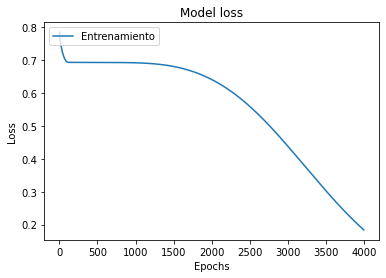

In [30]:
#Visualización de accuracy
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento'], loc='upper left')
#plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [32]:
#Cargar pesos y la arquitectura
model2=cargarRNN(nombreArchivoRedNeuronal) 

model2.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['acc']) #ADADELTA: An Adaptive Learning Rate Method
score = model2.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print("%s: %.2f%%" % (model2.metrics_names[1], score[1]*100))

#Fase de Testing
print('Resultado en Test:')
score = model2.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[1], score[1]*100))

Red Neuronal Cargada desde Archivo
Resultado en Train:
acc: 100.00%
Resultado en Test:
acc: 100.00%


In [33]:
import pandas as pd
np.set_printoptions(formatter={'float': lambda X: "{0:0.4f}".format(X)})
#nuevo_X=[[1,1,0,0]]
nuevo_X=X_test
predicciones=model2.predict(nuevo_X)
print(predicciones)
y_pred = (model2.predict(nuevo_X) >= 0.5).astype("int32")
y_pred = y_pred.flatten()# de 2D a 1D
y_test1D=y_test.flatten()
dataframeFinal=pd.DataFrame({'real':y_test1D, 'predicción': y_pred})
dataframeFinal.head(16)

1/1 [==============================] - 0s 145ms/step
[[0.1219]
 [0.8755]
 [0.9150]
 [0.0634]
 [0.8745]
 [0.2233]
 [0.0785]
 [0.9259]
 [0.8966]
 [0.0950]
 [0.2832]
 [0.8682]
 [0.1563]
 [0.6114]
 [0.7409]
 [0.2789]]
1/1 [==============================] - 0s 30ms/step


,real,predicción
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


<div style="color:#106ba3"><h3>Predicción de un nuevo elemento</h3> </div>

In [37]:
def predecir(nuevo_X):
    y_pred = (model2.predict(nuevo_X) >= 0.5).astype("int32")
    y_pred = y_pred.flatten()# de 2D a 1D
    return y_pred
nuevo_X=[[1,1,1,0]]
prediccion=predecir(nuevo_X)
print(prediccion)

1/1 [==============================] - 0s 53ms/step
[1]


<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Conclusiones</h2> </div>

En esta práctica has aprendido a implementar los pasos de una red neuronal con ejemplos clásicos de compuertas lógicas. Las redes neuronales son capaces de aprender y establecer reglas a partir del ajuste de pesos a lo largo del proceso de entrenamiento.

<div id="Referencias-enlaces" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Referencias y enlaces</h2> </div>

[1] Bishop, C. M. (2006). Pattern recognition and machine learning. springer.

[2] Duda, R. O., Hart, P. E., & Stork, D. G. (2012). Pattern classification. John Wiley & Sons.

[3] P. Joshi. (2017). Artificial intelligence with python. Packt Publishing Ltd.

[4] S. Raschka, V. Mirjalili. (2007). Python Machine Learning, Packt Publishing Ltd.

**Enlaces de documentación:**

https://keras.io/api

https://keras.io/api/optimizers

https://scikit-learn.org/stable/modules/cross_validation.html